1.- Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
link = "https://raw.githubusercontent.com/alexanderquispe/Diplomado_PUCP/main/_data/data_dengue_peru.csv"
data = pd.read_csv(link)
data.head(3)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172144 entries, 0 to 172143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Año              172144 non-null  int64 
 1   Semana           172144 non-null  int64 
 2   Eventos o daños  172144 non-null  object
 3   Departamento     172144 non-null  object
 4   Distrito         172144 non-null  object
 5   Provincia        172144 non-null  object
 6   Ubigeo           172144 non-null  int64 
 7   Casos            166047 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.5+ MB


2.-Generate ubigeo for Departments and Provinces taking the first two and four numbers.

In [3]:
data["Ubigeo"].isna().sum()

0

In [4]:
data["UBIGEO"]=data["Ubigeo"].apply(lambda x:str(x))
def complete_ubigeo(ubigeo):
    if len(ubigeo)<6:
        ubigeo = "0"+ubigeo
    return ubigeo
data["UBIGEO"]=data["UBIGEO"].apply(complete_ubigeo)

In [5]:
data["CCDD"]=data["UBIGEO"].apply(lambda x : x[:2])
data["IDPROV"]=data["UBIGEO"].apply(lambda x : x[:4])

In [6]:
data.head(3)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIGEO,CCDD,IDPROV
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,1801


In [7]:

data["Type"]=data["Casos"].apply(lambda x : type(x))
data["Type"].value_counts()

        

<class 'float'>    107328
<class 'str'>       64816
Name: Type, dtype: int64

In [8]:
data[data["Casos"]=="1,364"]

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIGEO,CCDD,IDPROV,Type
76223,2017,15,Dengue,PIURA,PIURA,PIURA,200101,"1,364",200101,20,2001,<class 'str'>


In [9]:
import re
def normaliza(text):
    if type(text)==str:
        text = re.sub(r'(\d+),(\d+)', r'\1\2', text)
        text=float(text)
    return text

In [10]:
data["Casos_num"]=data["Casos"].apply(normaliza)

3.- Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values.

In [11]:
data2021=data[data["Año"]==2021]
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
path_shp = "../Diplomado_PUCP/_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp"

districts_shp = gpd.read_file(path_shp)

In [12]:
districts_shp.head(3)

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."


In [13]:
merged = districts_shp.merge(data2021[["Casos_num","UBIGEO"]],on="UBIGEO")

In [14]:
merged.head(3)

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry,Casos_num
0,14,LAMBAYEQUE,01,CHICLAYO,06,LA VICTORIA,LA VICTORIA,140106,1401,140106,28,LA VICTORIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",1.0
1,14,LAMBAYEQUE,01,CHICLAYO,06,LA VICTORIA,LA VICTORIA,140106,1401,140106,28,LA VICTORIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",0.0
2,14,LAMBAYEQUE,01,CHICLAYO,06,LA VICTORIA,LA VICTORIA,140106,1401,140106,28,LA VICTORIA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",NaN


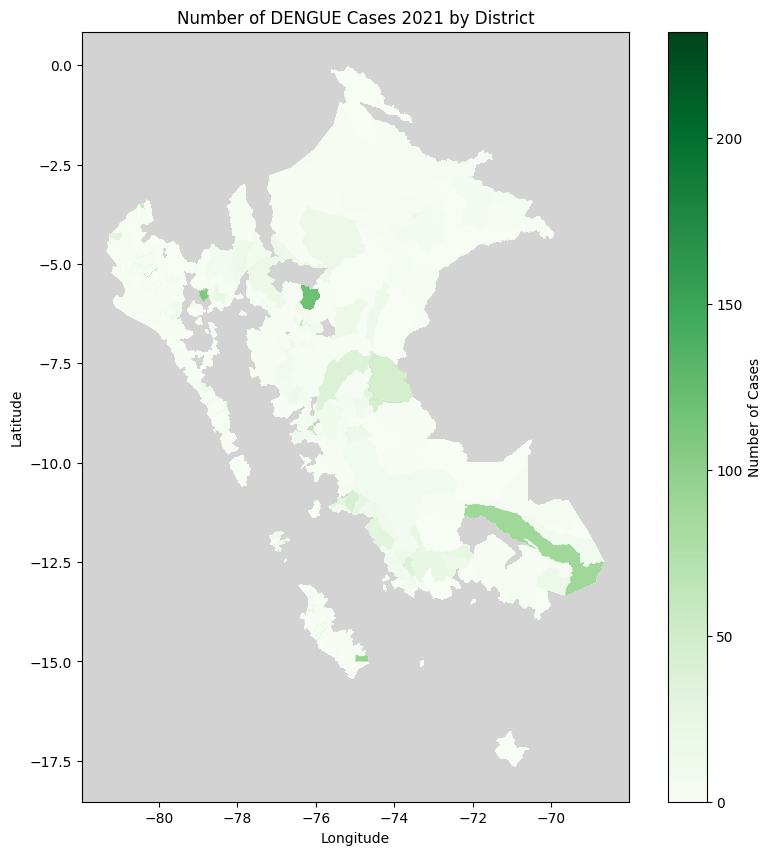

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

merged.plot(column='Casos_num', cmap='Greens', ax=ax, legend=True, legend_kwds={'label': 'Number of Cases'})

# set the title and axis labels
ax.set_title('Number of DENGUE Cases 2021 by District')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# add color for NA values
ax.set_facecolor('lightgrey')


4.- Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [144]:
#Seria igual que la 3 solo que por provincia pero me parece que faltaria el shape provincial y solo veo
#el distrital y el departamental

5.- Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [16]:
path_shp2 = "../Diplomado_PUCP/_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp"
departments_shp = gpd.read_file(path_shp2)

In [17]:
departments_shp.head(2)

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."


In [18]:
# Aggregate the data by department and year
agg_data = data.groupby(["Año", "Departamento"])["Casos_num"].sum().reset_index()

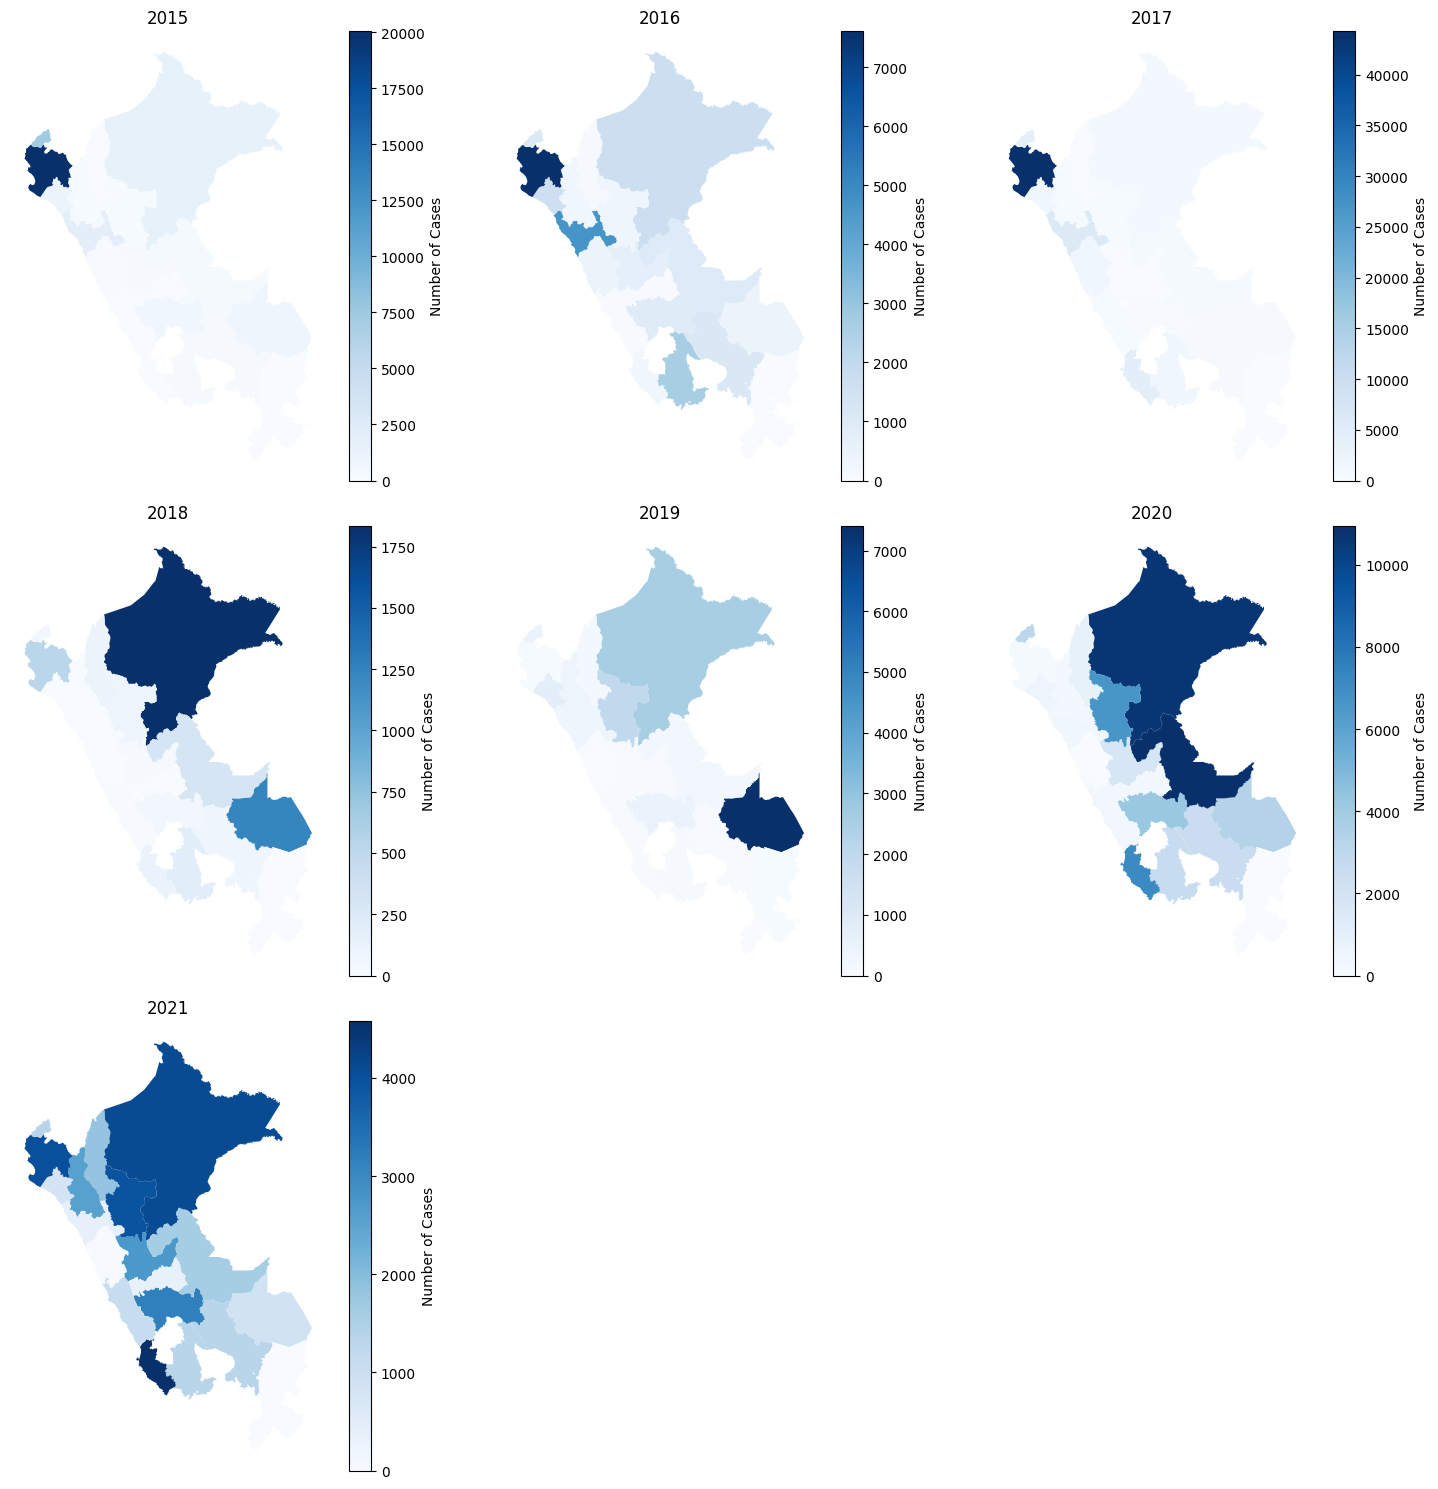

In [19]:

#Loop over years
years = sorted(data.Año.unique())
ncols = 3
nrows = (len(years)+ncols-1)//ncols

#creating subplots

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))

# Loop over years
for i, year in enumerate(years):
    # Filter data for year
    year_data = agg_data[agg_data['Año'] == year]
    
    # Merge with shapefile
    merged = departments_shp.merge(year_data, left_on='NOMBDEP', right_on='Departamento')
    
    
    # Plot
    ax = axs[i // ncols, i % ncols]
    
    merged.plot(column='Casos_num', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': 'Number of Cases'})
    ax.set_title(year)
    ax.axis('off')

    # add color for NA values
    ax.set_facecolor('red')

    

for j in range(i+1, nrows*ncols):
    axs[j // ncols, j % ncols].set_visible(False)
    
plt.tight_layout()
plt.show()


